## 10 - Calculating global average plate velocities (cm/yr)

In this notebook, we use GPlately's `Points` object to generate a global mesh point feature and calculate plate velocities at these points. Global average plate velocities (cm/yr) for each timestep are obtained by averaging these point velocities.

Let's import all needed packages:

In [1]:
import gplately

import numpy as np
import pygplates
import ptt
import glob, os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Let's calculate global average plate velocities with the Müller et al. (2019) plate reconstruction model: 

In [2]:
# Call GPlately data server and download Muller et al. 2019 plate reconstruction files
gdownload = gplately.download.DataServer("Muller2019")
rotation_model, topology_features, static_polygons = gdownload.get_plate_reconstruction_files()

# Use the PlateReconstruction object to create a plate motion model
model = gplately.PlateReconstruction(rotation_model, topology_features, static_polygons)

Below is a workflow that iterates through geological time:

In [29]:
time_array = np.arange(0,251)
vel_mag = []
global_average_plate_velocities = []
global_plate_velocities_sd = []

for time in time_array:
    
    # CREATING THE VELOCITY POINT DOMAIN
    # Global extent with 5-degree spacing
    Xnodes = np.arange(-180,180,5)
    Ynodes = np.arange(-90,90,5)

    # Turn into a mesh grid and flatten all coordinates back into 1d lat-lon arrays
    x,y = np.meshgrid(Xnodes,Ynodes)
    x = x.flatten()
    y = y.flatten()

    # Place all defined points into the GPlately Points object
    gpts = gplately.Points(model, x, y)

    vel_x, vel_y = gpts.plate_velocity(int(time))
    vel_mag = np.hypot(vel_x, vel_y)

    # Calculate the average and SD of these global point velocities with numpy
    global_average_plate_velocities.append(np.mean(vel_mag))
    global_plate_velocities_sd.append(np.std(vel_mag))
    
    print("{} Ma     Avg: {} cm/yr, SD: {} cm/yr".format(time, np.mean(vel_mag), np.std(vel_mag)))

0 Ma     Avg: 3.1644009755550213 cm/yr, SD: 2.2047486241133116 cm/yr
1 Ma     Avg: 3.1653668643412454 cm/yr, SD: 2.2124300037253115 cm/yr
2 Ma     Avg: 3.160429709764478 cm/yr, SD: 2.2073008042441016 cm/yr
3 Ma     Avg: 3.166446567545724 cm/yr, SD: 2.2101603715396925 cm/yr
4 Ma     Avg: 3.175578712138679 cm/yr, SD: 2.218156044108797 cm/yr
5 Ma     Avg: 3.286606025172085 cm/yr, SD: 2.417062432504273 cm/yr
6 Ma     Avg: 3.2430122855458103 cm/yr, SD: 2.373323132866303 cm/yr
7 Ma     Avg: 3.238271885878197 cm/yr, SD: 2.3703988490646677 cm/yr
8 Ma     Avg: 3.2445062280020647 cm/yr, SD: 2.3772499481817775 cm/yr
9 Ma     Avg: 3.247938060771082 cm/yr, SD: 2.3807126404614096 cm/yr
10 Ma     Avg: 2.9519115593039302 cm/yr, SD: 2.8270264174327138 cm/yr
11 Ma     Avg: 2.866855753285165 cm/yr, SD: 2.6025078969896853 cm/yr
12 Ma     Avg: 2.8600874886570793 cm/yr, SD: 2.5912001689177258 cm/yr
13 Ma     Avg: 2.8711997336070594 cm/yr, SD: 2.6251185409763393 cm/yr
14 Ma     Avg: 2.872957953474486 cm/yr, 

119 Ma     Avg: 3.8373046222450626 cm/yr, SD: 1.9319476548225152 cm/yr
120 Ma     Avg: 3.731878534232685 cm/yr, SD: 2.1776939550880905 cm/yr
121 Ma     Avg: 3.8270014920651816 cm/yr, SD: 2.454387927505438 cm/yr
122 Ma     Avg: 3.826722832846904 cm/yr, SD: 2.458037284358088 cm/yr
123 Ma     Avg: 3.9501717778318604 cm/yr, SD: 2.582767964210409 cm/yr
124 Ma     Avg: 4.036354947939786 cm/yr, SD: 2.559734456506193 cm/yr
125 Ma     Avg: 3.9617183609701514 cm/yr, SD: 2.5552964798731086 cm/yr
126 Ma     Avg: 4.005001754024536 cm/yr, SD: 2.4112653976223695 cm/yr
127 Ma     Avg: 3.932641179117371 cm/yr, SD: 2.5897966018927963 cm/yr
128 Ma     Avg: 3.553880946470126 cm/yr, SD: 2.5573496784276064 cm/yr
129 Ma     Avg: 3.397352920142927 cm/yr, SD: 2.8051718880194714 cm/yr
130 Ma     Avg: 3.1407357629265236 cm/yr, SD: 2.6723115984881467 cm/yr
131 Ma     Avg: 3.6215979873787956 cm/yr, SD: 2.652713786443473 cm/yr
132 Ma     Avg: 3.1356939369033308 cm/yr, SD: 2.351753378163147 cm/yr
133 Ma     Avg: 2.6

236 Ma     Avg: 3.5031219723687292 cm/yr, SD: 2.4191253493592932 cm/yr
237 Ma     Avg: 3.503924625666932 cm/yr, SD: 2.420808365850272 cm/yr
238 Ma     Avg: 3.5047354379256315 cm/yr, SD: 2.422616938182531 cm/yr
239 Ma     Avg: 3.505553024767813 cm/yr, SD: 2.4245480997329167 cm/yr
240 Ma     Avg: 3.3283516688807855 cm/yr, SD: 2.398465897436663 cm/yr
241 Ma     Avg: 3.328379612880822 cm/yr, SD: 2.3974151001217994 cm/yr
242 Ma     Avg: 3.328409212412649 cm/yr, SD: 2.3964163965948826 cm/yr
243 Ma     Avg: 3.3284392798147704 cm/yr, SD: 2.395466829230086 cm/yr
244 Ma     Avg: 3.3284686345664607 cm/yr, SD: 2.394563357162028 cm/yr
245 Ma     Avg: 3.3764749716418145 cm/yr, SD: 2.79009106159155 cm/yr
246 Ma     Avg: 3.3767400861846246 cm/yr, SD: 2.792932223162721 cm/yr
247 Ma     Avg: 3.376999366747939 cm/yr, SD: 2.7957951891340045 cm/yr
248 Ma     Avg: 3.3772516611351704 cm/yr, SD: 2.7986764357459073 cm/yr
249 Ma     Avg: 3.4223933763882854 cm/yr, SD: 2.8638262233389287 cm/yr
250 Ma     Avg: 0.9

### Visualise the velocity data

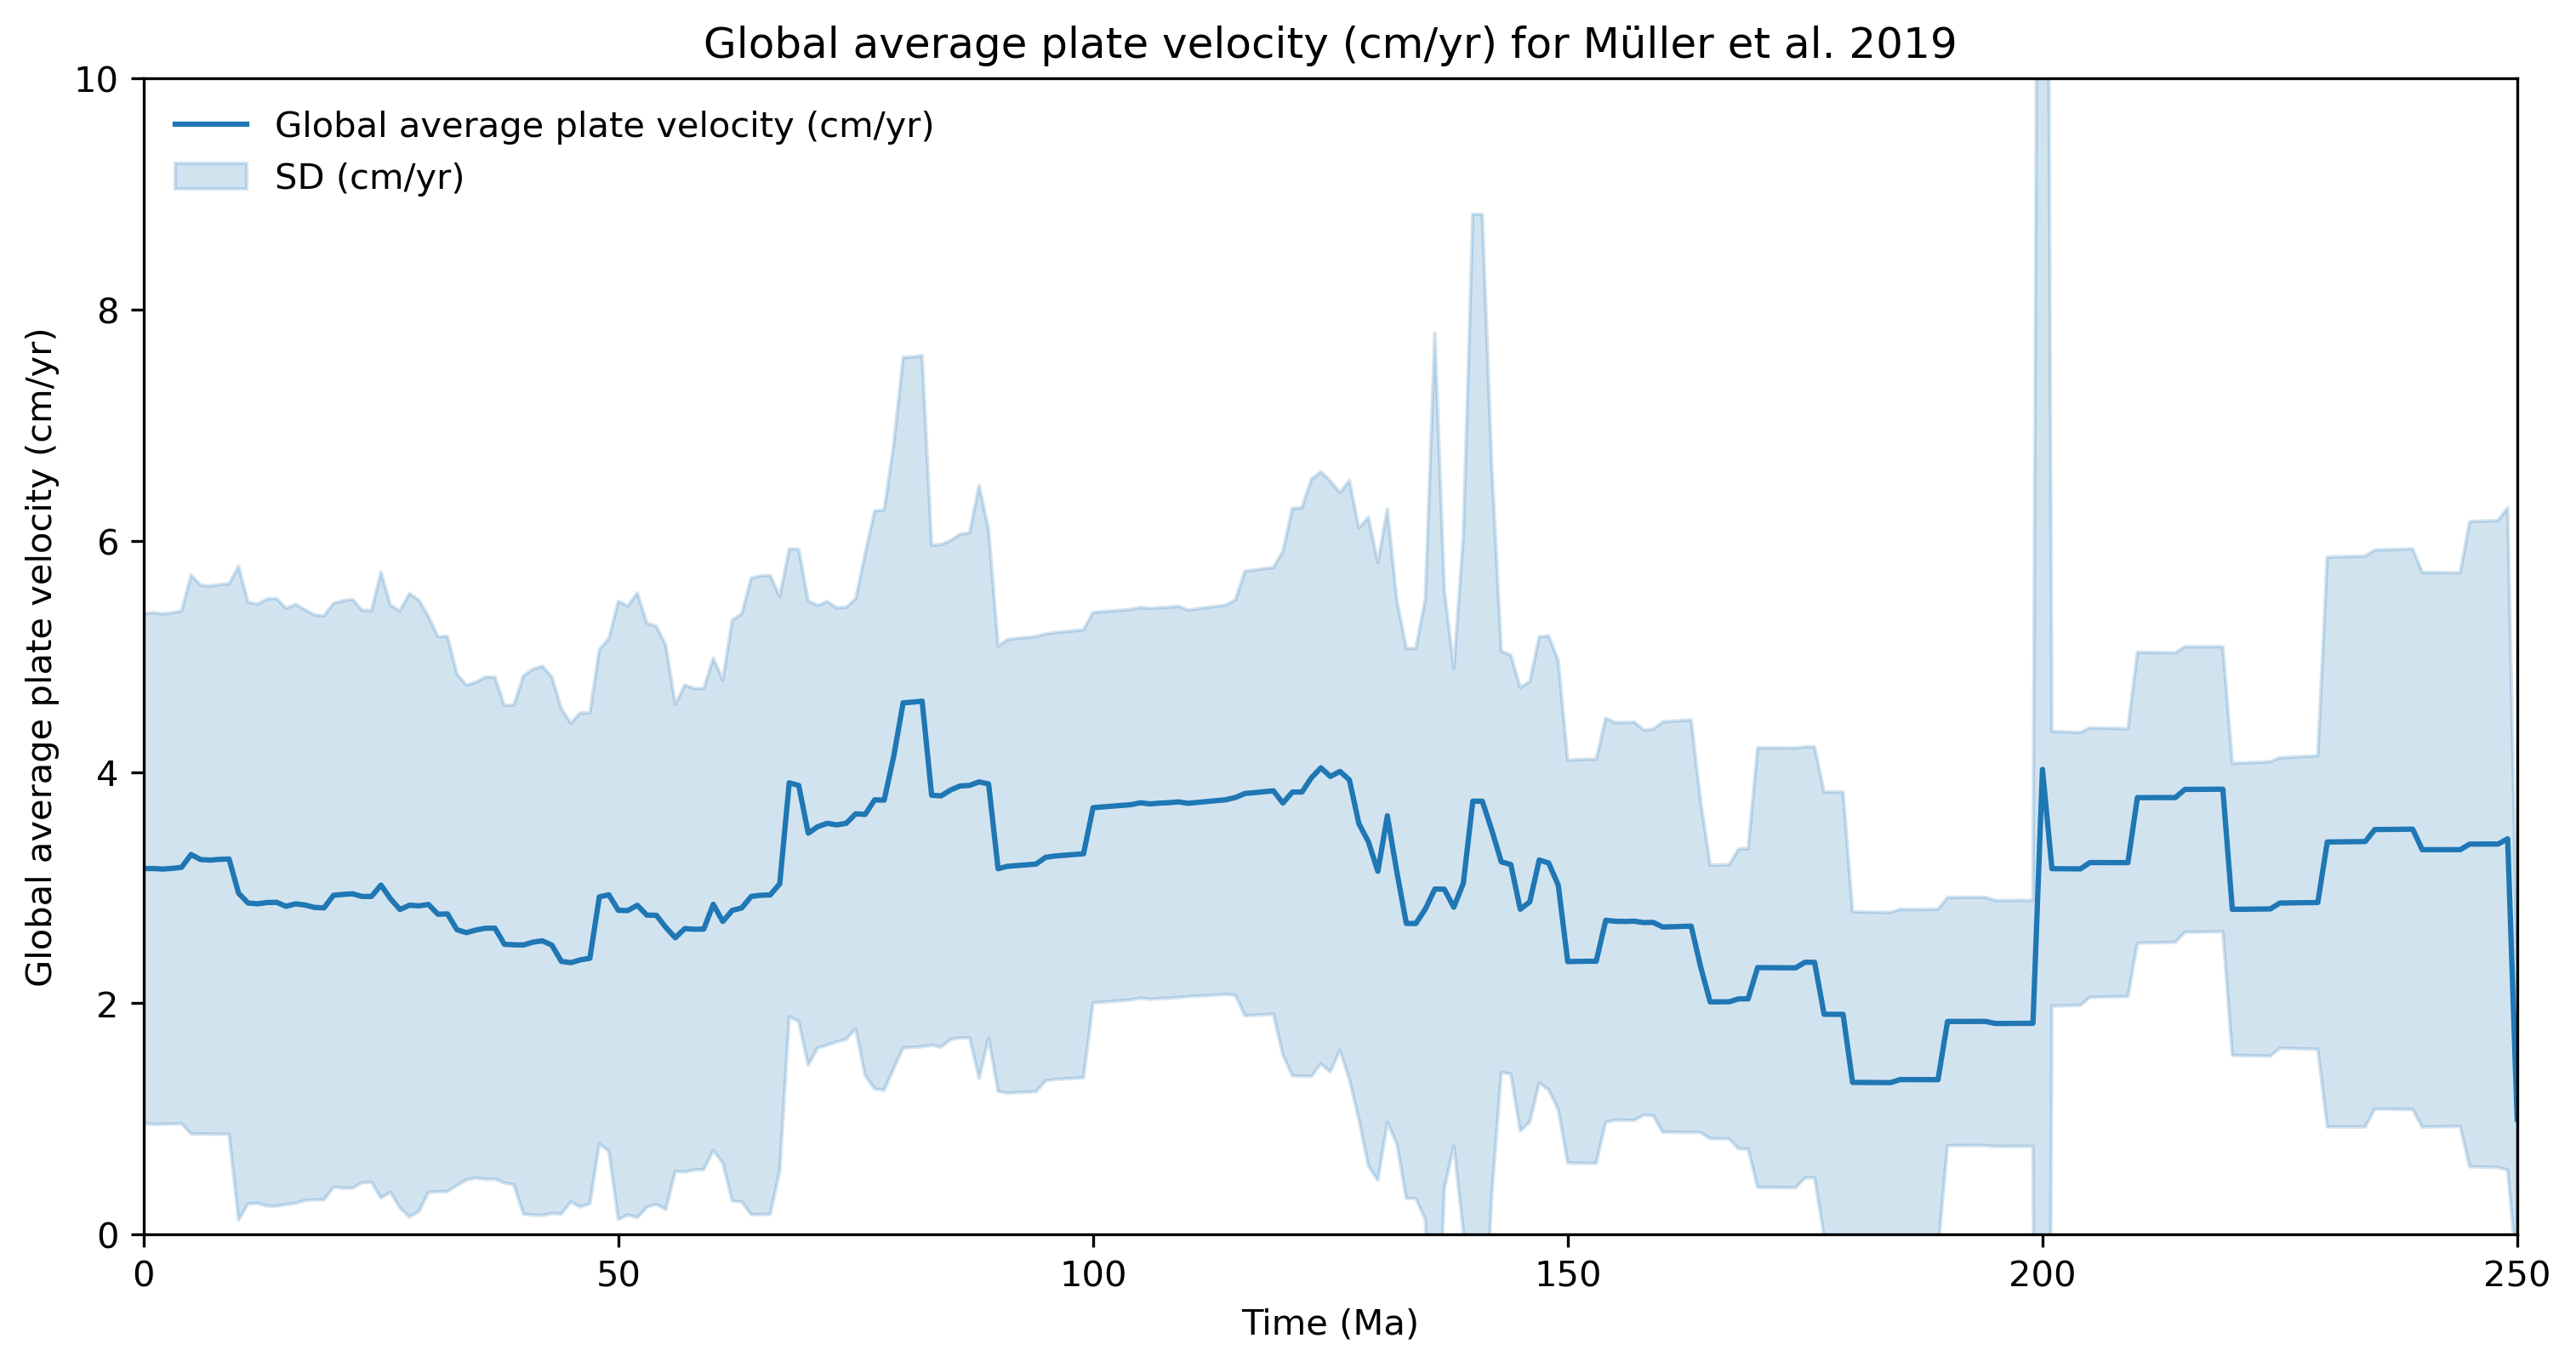

In [39]:
platevel = np.array(global_average_plate_velocities)
platevelstd = np.array(global_plate_velocities_sd)

plt.figure(figsize=(12, 6), dpi=300)
plt.plot(time_array, platevel, label="Global average plate velocity (cm/yr)")
plt.fill_between(time_array, 
                 platevel-platevelstd,
                 platevel+platevelstd,
                 edgecolor='C0',
                 alpha=0.2,
         label="SD (cm/yr)")     
plt.title("Global average plate velocity (cm/yr) for Müller et al. 2019")
plt.ylabel("Global average plate velocity (cm/yr)") 
plt.xlabel("Time (Ma)")
plt.xlim(0, 250)
plt.ylim(0, 10)
plt.legend(loc="upper left", frameon=False)

### Write velocity data to a CSV file

In [37]:
import csv
csv_directory = "./NotebookFiles/Muller2019_GlobalAveragePlateVelocities_0-250Ma.csv"

data_for_csv = np.column_stack((time_array,
                               global_average_plate_velocities,
                               global_plate_velocities_sd))

# open the file in the write mode
with open(csv_directory, 'w', encoding='UTF8', newline='') as f:
    
    # create the csv writer
    writer = csv.writer(f)
    writer.writerow(['Time (Ma)', "Global average plate velocities (cm/yr)", "Standard deviation of global average plate velocities (cm/yr)"])
    
    # write a row to the csv file
    writer.writerows(data_for_csv)